In [28]:
%matplotlib inline 
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import cv2
from scipy.interpolate import interpn
from tqdm.auto import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.transforms as mtransforms
import matplotlib.patches as patches
import cv2 

In [2]:
import glob
video_images = []
for infile in sorted(glob.glob('data/video_seq/*.png')):
    # print("Current File Being Processed is: ",infile)
    video_images.append(infile)

In [3]:
# load video sequence, 5 second video res = (1080, 1920), 151 frames extracted using ffmpeg command 
# ffmpeg -i "q3_video.mov" -f image2 "video-frame%05d.png"
vid = []
for ind, i in enumerate(video_images[:19]):
    img = skimage.io.imread(i)
    vid.append(img)

In [4]:
def normalize(img):
    return (img - img.min())/(img.max() - img.min())

In [5]:
norm_vid = []
for v in vid: 
    img_norm = normalize(v)
    norm_vid.append(img_norm)
    # print(img_norm.min(), img_norm.max())
video = np.stack(norm_vid, axis=0)
print(video.shape)

(19, 1920, 1080, 3)


/var/folders/hd/n1h1bh010cv5cm5k41bsp7y00000gp/T/ipykernel_42668/1472247297.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/hd/n1h1bh010cv5cm5k41bsp7y00000gp/T/ipykernel_42668/1472247297.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


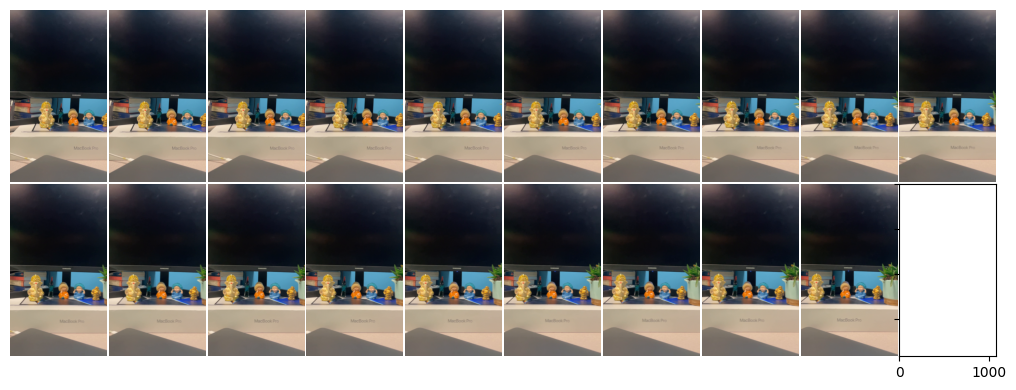

In [7]:
fig = plt.figure(figsize=(12, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 10), share_all=True)
for i, (ax, im) in enumerate(zip(grid, video)):
    ax.imshow(im)  
    ax.axis("off")
plt.tight_layout()
plt.tight_layout()
plt.savefig('q3.png')
plt.show()

In [8]:
def luminance(img):
    M_RGB_XYZ = np.array([[0.4124564, 0.3575761, 0.1804375],
     [0.2126729, 0.7151522, 0.0721750],
     [0.0193339, 0.1191920, 0.9503041]])
    xyz = np.matmul(img, M_RGB_XYZ)
    return xyz[:, :, 1]

In [9]:
frames, h, w, c = video.shape
grayscale_vid = np.zeros((frames, h, w))
for f in range(frames):
    grayscale_vid[f, :, :] = luminance(video[f, :, :, :])
print(grayscale_vid.shape)

(19, 1920, 1080)


In [51]:
# # template
# fig, ax = plt.subplots()

# ax.imshow(grayscale_vid[-3, :, :], cmap='gray')

# rect2 = patches.Rectangle((65, 960), 500, 400, linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect2)

# plt.show()

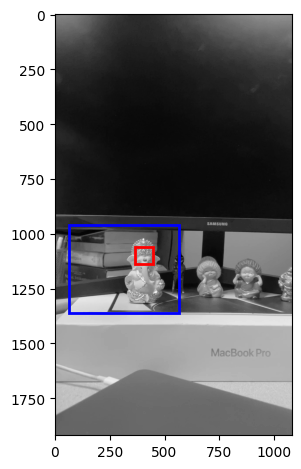

(1920, 1080)


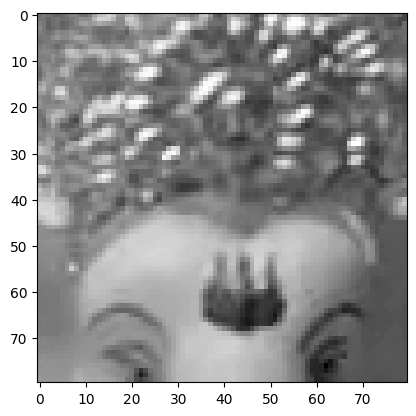

(80, 80)


In [53]:
# template
fig, ax = plt.subplots()

ax.imshow(grayscale_vid[0, :, :], cmap='gray')
rect = patches.Rectangle((365, 1060), 80, 80, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect2 = patches.Rectangle((65, 960), 500, 400, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
plt.savefig('data/results/patch.png')
plt.tight_layout()
plt.show()

template_img = grayscale_vid[0, :, :]
print(template_img.shape)
g_template = template_img[1060:1060+80, 365:365+80]
plt.imshow(g_template, cmap='gray')
plt.savefig('data/results/template.png')
plt.show()
print(g_template.shape)

In [31]:
# apply box filter 
def box_filter(img):
    kernel = np.ones((80,80),np.float32)/6400
    dst = cv2.filter2D(img,-1,kernel)
    return dst 

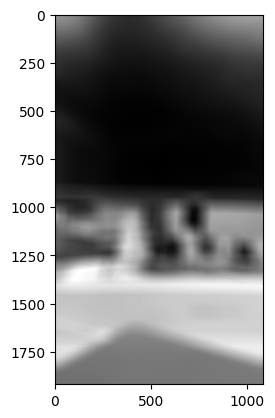

In [34]:
im_temp = grayscale_vid[0, :, :]
plt.imshow(im_temp, cmap='gray')
temp = box_filter(im_temp)
plt.imshow(temp, cmap='gray')
plt.show()

In [ ]:
# normalized cross correlation for every frame 
ind = 2
frame = grayscale_vid[ind, :, :]
search = frame[]

In [ ]:
# shift and sum